In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$c_0=0.1m/s$

$c=1m/s$ for $x<-2.5m$

$u(x,0)=2(c(x,0)−c_0)$


In [2]:
Ci=0.1
Cm=1
x0=0
xm=-2.5
s=1.0*(Ci-Cm)/(x0-xm) #slope of velocity/distance 
print (s)

-0.36


In [3]:
def C0(x):       #defines the initial speed 
    if x<-2.5:
        return Cm
    
    elif x>0:
        return Ci
    
    else:
        return s*x+Ci

def u0(x):
    return 2*(C0(x)-Ci)

In [4]:
N=1001 #number of data points

X=linspace(-2.5,2.5,N)

t=1.1  #time

dt=t/(N-1) # time interval

dx=5/(N-1)

In [5]:
Xp = zeros(N) #positive displacement array

Xn = zeros(N) #negative displacement array
                 
C = zeros((N,N))  #speed array: 1st index is position; 2nd index is the time

U = zeros((N,N))

Rp = zeros(N)  #positive characteristics array
    
Rn = zeros(N)  #negative characteristics array

$R_+=u+2c$

$R_-=u-2c$

In [6]:
for i in range(N):  #initial speed
    U[0,i]=u0(X[i])
    C[0,i]=C0(X[i])
    Rp[i] = U[0,i]+2*C[0,i] #R+
    Rn[i] = U[0,i]-2*C[0,i] #R-
print('the intial speed u is: %s'%U[0,:])
print('the intial wave speed c is: %s' %C[0,:])
print('the R+ is: %s' %Rp) 
print('the R- is: %s' %Rn)


the intial speed u is: [1.8    1.7964 1.7928 ... 0.     0.     0.    ]
the intial wave speed c is: [1.     0.9982 0.9964 ... 0.1    0.1    0.1   ]
the R+ is: [3.8    3.7928 3.7856 ... 0.2    0.2    0.2   ]
the R- is: [-0.2 -0.2 -0.2 ... -0.2 -0.2 -0.2]


$X_{+}=X_{old}+(u+c)\delta t$

$X_{-}=X_{old}+(u-c)\delta t$


$u=(R_++R_-)/2$

$c=(R_+-R_-)/4$

In [7]:
for i in range(1,N):
    for j in range(N):
        Xp[j]=X[j]+(U[i-1,j]+C[i-1,j])*dt  # find the new X+
        Xn[j]=X[j]+(U[i-1,j]-C[i-1,j])*dt  # find the new X-
        
    Rp = interp(X, Xp, Rp)   #interpolate R+

    Rn = interp(X, Xn, Rn)   #interpolate R-
    
    for k in range(N):
        U[i,k]=(Rp[k]+Rn[k])/2    # find the new speed 
        C[i,k]=(Rp[k]-Rn[k])/4     

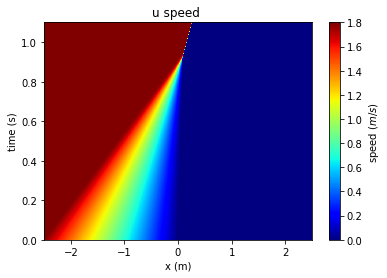

In [8]:
T = linspace(0,t,N)
pcolormesh(X, T, U, cmap='jet')
cb=colorbar()
cb.set_label('speed ($m/s$) ')
locs,labels = xticks()
xlabel('x (m)')
ylabel('time (s)')
title('u speed ')
show()

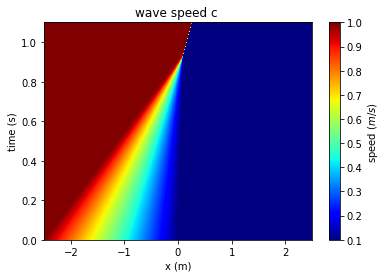

In [9]:
T = linspace(0,t,N)
pcolormesh(X, T, C, cmap='jet')
xlabel('x (m)')
ylabel('time (s)')
title('wave speed c ')
cb=colorbar()
cb.set_label('speed ($m/s$) ')
locs,labels = xticks()
show()

At about 0.9s, the wave becomes the steeping wave. All the characteristic path intersect.

characteristic path

$\frac{dx}{dt}=u+c=3c-2c_0$

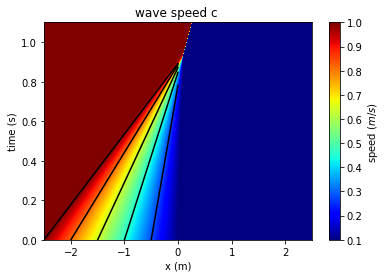

In [10]:
T = linspace(0,t,N)
pcolormesh(X, T, C, cmap='jet')
xlabel('x (m)')
ylabel('time (s)')
title('wave speed c ')
cb=colorbar()
cb.set_label('speed ($m/s$) ')
locs,labels = xticks()
nn=[-2.5,-2,-1.5,-1,-0.5]  # the choice of initial x
for i in range(len(nn)):
    xx=linspace(nn[i],0,100)    
    tt=1/(3*C0(nn[i])-2*Ci)*(xx-nn[i])  #slope = dt/dx=1/(3c(x,0)-2c0)
    plot(xx,tt,'k')
show()


We can see that C(x,t) is constant along these pathes. It mathes the theory.

### Reading

R1: If the friction term is neglectable(e.g small viscosity). The flow with high viscosity, would be a bad assumption.

R2: Friction and gravity

R3: The angle is preserved. If we have some ugly boundary condition, we can map it to get simple form. (e.g  we can transform the Airfoil into a new complex plane, and makes the shape simpler, so it's more doable. )